In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

# funciton that returns dy/dt
def model(y, t, alfa, beta):
    dydt = beta - y * alfa
    return dydt

def response_time(alfa, beta):
    print("Response time for alfa = {} and beta = {} is {}".format(alfa, beta, round((math.log(2)) / alfa, 5)))


# intitial condition
y0 = 0
t = np.linspace(0,10)



# solve ODE
alfa1 = 0.25
beta1 = alfa1 * 1.5
y1 = odeint(model, y0, t, (alfa1, beta1))

alfa2= 0.5
beta2 = alfa2 * 1.5
y2 = odeint(model, y0, t, (alfa2, beta2))

alfa3 = 1.0
beta3 = alfa3 * 1.5
y3 = odeint(model, y0, t, (alfa3, beta3))

alfa4 = 1.5
beta4 = alfa4 * 1.5
y4 = odeint(model, y0, t, (alfa4, beta4))



# plot results
plt.plot(t,y1,'r-', linewidth=2, label='alfa = {}, beta = {}'.format(alfa1, beta1))
plt.plot(t,y2,'c--', linewidth=2, label='alfa = {}, beta = {}'.format(alfa2, beta2))
plt.plot(t,y3,'g--', linewidth=2, label='alfa = {}, beta = {}'.format(alfa3, beta3))
plt.plot(t,y4,'b:', linewidth=2, label='alfa = {}, beta = {}'.format(alfa4, beta4))
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

response_time(alfa1, beta1)
response_time(alfa2, beta2)
response_time(alfa3, beta3)
response_time(alfa4, beta4)

Response time for alfa = 0.25 and beta = 0.375 is 2.77259
Response time for alfa = 0.5 and beta = 0.75 is 1.38629
Response time for alfa = 1.0 and beta = 1.5 is 0.69315
Response time for alfa = 1.5 and beta = 2.25 is 0.4621


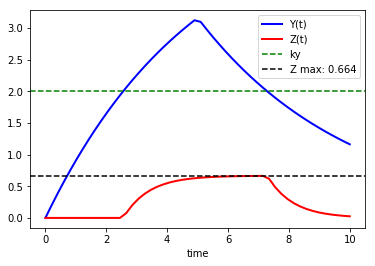

In [2]:
# model of cascade with three activators
def model_XYZ_activators(cascade, t, D, ky):
    y = cascade[0]
    z = cascade[1]
    
    alfa_y = 0.2
    beta_y = 1.0

    alfa_z = 1.2
    beta_z = 0.8
        
        
    if(t > D):
        beta_y = 0
        
    if(y < ky):
        beta_z = 0
        
    dydt = beta_y - alfa_y * y
    dzdy = beta_z - alfa_z * z
    
    return dydt, dzdy


# initial condition, Y and Z starts out at 0
cascade0 = [0,0]
t = np.linspace(0,10)
D = 5
ky = 2.0


# solve ODE
cascade = odeint(model_XYZ_activators, cascade0, t, (D, ky))

y = cascade[:,0]
z = cascade[:,1]

z_max = round(max(z.flatten()), 3)

plt.plot(t, y, 'b-', linewidth=2, label='Y(t)')
plt.plot(t, z, 'r-', linewidth=2, label='Z(t)')
plt.axhline(y = ky, color='g', linestyle='--', label="ky")
plt.axhline(y = z_max, color='k', linestyle='--', label="Z max: {}".format(z_max))
plt.xlabel('time')
plt.legend()
plt.show()


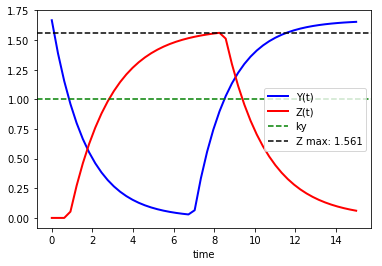

In [3]:
# model of cascade with three repressors
def model_XYZ_repressors(cascade, t, D, ky):
    y = cascade[0]
    z = cascade[1]
    
    alfa_y = 0.6
    beta_y = 1.0

    alfa_z = 0.5
    beta_z = 0.8
        
        
    if(t < D):
        beta_y = 0
        
    if(y > ky):
        beta_z = 0
        
    dydt = beta_y - alfa_y * y
    dzdy = beta_z - alfa_z * z
    
    return dydt, dzdy
    
    
# initial condition, Y starts out at steady state, Z is repressed by Y and is thought to be at 0 at t = 0
cascade0 = [1.0 / 0.6, 0]
t = np.linspace(0,15)
D = 7
ky = 1.0

# solve ODE
cascade = odeint(model_XYZ_repressors, cascade0, t, (D, ky))

y = cascade[:,0]
z = cascade[:,1]

z_max = round(max(z.flatten()), 3)

plt.plot(t, y, 'b-', linewidth=2, label='Y(t)')
plt.plot(t, z, 'r-', linewidth=2, label='Z(t)')
plt.axhline(y = ky, color='g', linestyle='--', label="ky")
plt.axhline(y = z_max, color='k', linestyle='--', label="Z max: {}".format(z_max))
plt.xlabel('time')
plt.legend()
plt.show()